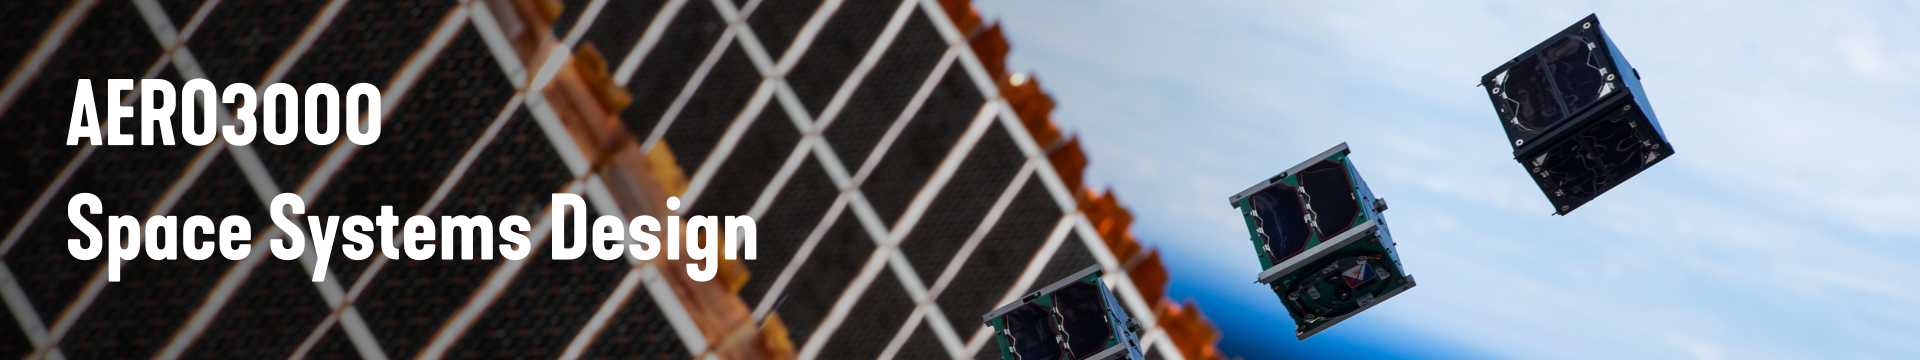

<table width="100%">
  <tr>
    <td width="33.3%" style="text-align:center;"><b>Faculty of Science and Engineering</b></th>
    <td width="33.3%" style="text-align:center;"><b>Space Science and Technology Centre</b></th>
    <td width="33.3%" style="text-align:center;"><b>CRICOS Provider Code 00301J</b></th>
  </tr>
</table>

<div style="margin-left:40px;margin-right:40px;margin-top:25px;margin-bottom:20px;border:1px solid;padding:5px;padding-top:15px;text-align:center;">
<p style="text-align:center;"><b>WARNING</b></p>
<p style="text-align:center;">This material has been reproduced and communicated to you by or on behalf of <b>Curtin University</b> in accordance with section 113P of the Copyright Act 1968 <b>(the Act)</b>.</p>
<p style="text-align:center;">The material in this communication may be subject to copyright under the Act. Any further reproduction or communication of this material by you may be the subject of copyright protection under the Act.</p>
<p style="text-align:center;">Do not remove this notice.</p>
</div>
</html>

<p style="margin-left:40px;margin-right:40px;margin-top:20px;margin-bottom:20px;padding:20px;text-align:center;background-color:var(--jp-layout-color2, LightGray);font-weight:normal">Upon opening this workbook, press Ctrl+Shift+Enter on your keyboard or navigate to "Run›Run All Cells" in the main menu to run all cells in this notebook to load the content.</p>

# Week 3 - Orbital Mechanics

**Summary:** This week will give you a basic overview of orbital mechanics.

## Week 3 Objectives

By the end of this week you will:
- Understand how objects get into orbit and stay in orbit,
- Learn how we describe an orbit using the six classical orbital elements,
- Understand the rocket equation and what factors influence a rocket's fuel efficiency,
- Learn how to do basic orbital calculations for moving from one orbit to another, and
- Understand factors that make orbits change over time (which are called perturbations).

**Unit Learning Outcomes:**
As you accomplish these objectives, you will develop towards unit learning outcomes one and two:

1.  Design and justify suitable mission architectures for space missions accounting 
for the relevant considerations,
2.  Model the operation of a space mission and behaviour of a spacecraft in the 
space environment.


## How Do Orbits Work?

In [1]:
%%html
<div style="padding-top:64.3%;"><iframe src="https://echo360.org.au/media/bf9471ed-28b0-4e42-974a-f3287e87e4f8/public?autoplay=false&automute=false" frameborder="0" allowfullscreen style="position:absolute;top:0;left:0;width:100%;height:100%;max-height:1000px;"></iframe></div>

## Elliptical Orbits

1. If the orbit diagram below hasn't displayed, click into the cell containing the Python code below and hit Ctrl+Enter on your keyboard or click the Run (triangle) button in the toolbar at the top of the notebook to run the Python code contained in the cell.

     Don't worry too much about the Python code if you haven't used Python before. The focus in this unit will be on how we can use maths to answer questions about spacecraft and mission design not on programming. We will provide you with boilerplate Python code for plotting and provide assistance if you're having any trouble with Python or plotting.

2. Scroll down and **adjust** the eccentricity *e* and the semi-major axis *a* in the interactive diagram in the output cell below the code cell using the sliders to get a feel for the shape of different eccentric orbits and the effect changing the eccentricity and semi-major axis have on the shape of the orbit.

3. See if you can **find** the eccentricity and semi-major axis of an orbit that is around 500 km altitude (smallest grey circle, barely distinguishable from the Earth) at the closest point to Earth and 35,000 km altitude at the furthest point (largest grey circle).

    You will be notified when you have the correct values.

<p style="margin-left:40px;margin-right:40px;margin-top:20px;margin-bottom:20px;padding:20px;text-align:center;background-color:var(--jp-layout-color2, LightGray);font-weight:normal">Select the collapsed code cell below and press Ctrl+Enter on the keyboard to run it to generate the interactive figure.</p>

In [1]:
import numpy as np #import array manipulation and maths library numpy under the alias np
import plotly.graph_objects as go #import our plotting library under the alias go
import ipywidgets as widgets #import our interactive widgets library under the alias widgets
from ipywidgets import interact,FloatSlider #for interactive sliders
from astropy import units as u #import the astropy units package so we can use real world units conveniently

## TODO Remove
from scipy.spatial.transform import Rotation as R #import SciPy rotation library under the alias R for Euler angle rotations

class Earth:
    """Earth class with useful atributes, used as poliastro is not available in JupyterLite"""
    name = "Earth"
    #radius, source: Archinal, B.A. et al. "Report of the IAU working group on cartographic coordinates and rotational elements: 2015"
    #Celestial Mechanics and Dynamical Astronomy 109(2011): 101-135. DOI: https://doi.org/10.1007/s10569-010-9320-4
    R =  6371.0084*u.km
    
    #CSS colour name for plotting
    color = "lightskyblue"
    
    #atmosphere properties for plotting
    has_atmosphere = True
    #atmosphere "height" and CSS colour for visualisation
    atmosphere_height = 100*u.km
    atmosphere_color = "lightblue"
    atmosphere_opacity = 0.2


#Primary body (that the spacecraft is orbiting)
body=Earth
#Initial orbital parameters for the spacecraft
sma_initial = (body.R+2000*u.km).to(u.km).value
ecc_initial = 0
nu_initial = 0

#altitude reference circles
z_ref_1 = 500
z_ref_2 = 35000

#resolution of orbit and body in plots
res = 200 #number of points used to plot ellipse & body

#height of plot figure
figure_height = 1000

#elipse2d function definition
def ellipse2d(sma, ecc, res):
    """Ellipse line creation function for use with Plotly go.Scatter"""
    theta = np.linspace(0, 2*np.pi, res)
    
    #create ellipse points on a 2d plane
    xs = sma*np.cos(theta)-sma*ecc
    ys = sma*np.sqrt(1-ecc**2)*np.sin(theta)
    
    return xs, ys

#create a scatter plot from the x and y arrays
fig = go.FigureWidget()

fig.layout.template = "plotly_dark" #change plotly theme to dark mode

#update figure layout as needed
fig.update_layout(title_text="2D Orbit Plot", #set figure title
    #set height & activate width autosize
    height=figure_height,
    autosize=True,
    showlegend=True,
    #set axes ranges
    # yaxis_range=[-5*body.R.to(u.km).value,5*body.R.to(u.km).value],
    #set axes titles
    xaxis_title="X Axis (km)",
    yaxis_title="Y Axis (km)")

# #add the orbit ellipse to the graph
orbit_xs, orbit_ys = ellipse2d(sma_initial, ecc_initial, res) #create orbit ellipse
fig.add_trace(go.Scatter(x=orbit_xs, y=orbit_ys, mode="lines", marker_color="red", name="Orbit")) #add ellipse to graph

#add annotation to tell the student when they have found the correct values of sma and ecc
fig.add_trace(go.Scatter(x=[0], y=[-25000], text="Correct, great work!", mode="text", textfont_size=36, showlegend=False, opacity=0))

#add the body to the graph
body_xs, body_ys = ellipse2d(body.R, 0, res) #create body ellipse (eccentricity=0 for a circle)
fig.add_trace(go.Scatter(x=body_xs, y=body_ys, mode="text", name=body.name, fill="toself", fillcolor=body.color)) #add the body to the graph

if(body.has_atmosphere):
    #add the atmosphere to the graph
    atmosphere_xs, atmosphere_ys = ellipse2d(body.R.to(u.km).value+body.atmosphere_height.to(u.km).value, 0, res) #create atmosphere ellipse (eccentricity=0 for a circle)
    fig.add_trace(go.Scatter(x=atmosphere_xs, y=atmosphere_ys, mode="text", name=body.name+"Atmosphere", fill="toself", fillcolor=body.atmosphere_color, opacity=body.atmosphere_opacity)) #add the atmosphere to the graph

#add altitude marker circles to graph
z_ref1_xs, z_ref1_ys = ellipse2d(body.R+z_ref_1*u.km, 0, res) #create reference ellipse (eccentricity=0 for a circle)
fig.add_trace(go.Scatter(x=z_ref1_xs, y=z_ref1_ys, mode="lines", marker_color="lightgrey", name="Z = {} km".format(z_ref_1), opacity=0.4)) #add the body to the graph
z_ref2_xs, z_ref2_ys = ellipse2d(body.R+z_ref_2*u.km, 0, res) #create reference ellipse (eccentricity=0 for a circle)
fig.add_trace(go.Scatter(x=z_ref2_xs, y=z_ref2_ys, mode="lines", marker_color="grey", name="Z = {} km".format(z_ref_2), opacity=0.4)) #add the body to the graph



#update function for graph
def update(sma_km, ecc):
    #convert sma into km
    sma = sma_km
   #update plot
    with fig.batch_update():
        #orbit
        orbit_xs, orbit_ys = ellipse2d(sma, ecc, res)
        fig.data[0].x = orbit_xs
        fig.data[0].y = orbit_ys
        #update line colour and text opacity if orbital parameters are correct for the question
        if ( 24170 < sma_km and sma_km < 24370 and 0.705 < ecc and ecc < 0.715):
            fig.data[0].line.color="limegreen"
            fig.data[0].name="Orbit (Correct 🎉)"
            fig.data[1].opacity=1
        else:
            fig.data[0].line.color="red"
            fig.data[0].name="Orbit"
            fig.data[1].opacity=0
        
        fig.layout.xaxis.scaleanchor="y"
        # fig.data[0].name = "Orbit: a = {}, e = {}, i = {}, raan = {}, argp = {}".format(sma, ecc, inc, raan, argp)

layout = widgets.Layout(width="99%") #make the widgets wider so the slider bars are bigger

#create the slider widgets and link up with the callback function that updates the graph        
interact(update,
    sma_km=FloatSlider(
        min=1000,
        max=60000,
        step=10,
        readout_format=".0f",
        value=sma_initial,
        description="Semi-Major Axis, a (km)",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout),
    ecc=FloatSlider(
        min=0,
        max=1,
        step=0.01,
        readout_format=".2f",
        value=ecc_initial,
        description="Eccentricity, e",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout)
);

fig #diplay the interactive plot widget

interactive(children=(FloatSlider(value=8371.008399999999, description='Semi-Major Axis, a (km)', layout=Layou…

FigureWidget({
    'data': [{'line': {'color': 'red'},
              'marker': {'color': 'red'},
              'mode': 'lines',
              'name': 'Orbit',
              'type': 'scatter',
              'uid': '25e34021-7cf0-46a4-8524-f36b7ed00c74',
              'x': array([ 8371.0084    ,  8366.83619839,  8354.3237525 ,  8333.483535  ,
                           8304.33631988,  8266.91116172,  8221.24536673,  8167.38445556,
                           8105.38211794,  8035.30015916,  7957.20843843,  7871.18479928,
                           7777.31499194,  7675.69258788,  7566.41888652,  7449.60281426,
                           7325.3608159 ,  7193.81673857,  7055.10170827,  6909.35399916,
                           6756.71889571,  6597.34854793,  6431.40181964,  6259.04413014,
                           6080.44728934,  5895.78932645,  5705.25431253,  5509.03217704,
                           5307.31851847,  5100.31440938,  4888.22619596,  4671.26529236,
                           

## Basic Orbital Mechanics Reading

With the introductions above, you should have everything you need to begin exploring orbital mechanics more generally. Our textbook communicates the topics succinctly and clearly presents the maths needed for basic orbital descriptions and calculations.

Now is the time to read sections 4.1 and 4.2 (pages 79-91) of Chapter 4 in *Spacecraft Systems Engineering*: https://onlinelibrary.wiley.com/doi/pdfdirect/10.1002/9781119971009.ch4. While you are reading, focus on the points below:

- From section 4.1, you should now understand Kepler's 3 laws and how we can use them to approximate the orbital motion. You should also understand that there are various gravitational and non-gravitational forces that cause real orbits to deviate from these approximations.
 
- From section 4.2, you should now understand the terminology "two-body problem" and "restricted two-body problem" as well as know the four shapes of two-body orbits. You should also be familiar with the terminology we use when discussing an orbit including (amongst other terms) "line of apsides", "apoapsis", "periapsis" and "true anomaly". You should also be able to recall that there are equations in section 4.2 that let us easily calculate helpful parameters such as the orbital period (τ). **Do not feel the need to immediatly understand all of the maths and equations presented in the text book.** When reading through this chapter, the aim is to **familiarise yourself with the type of parameters that we can calculate** and for you to be able to recall where to **refer back to when you need** to calculate these things in the future in the activities, workshops and assessments. 
 
There is also no need to memorise any of these equations as you will be able to refer back to the book in the future when needed. Remember there are no tests or exams in this unit.

## How We Can Describe Orbits Using Orbital Elements

In [3]:
%%html
<div style="padding-top:64.3%;"><iframe src="https://echo360.org.au/media/16d6dfd7-8db1-485f-b3da-a305815dd282/public?autoplay=false&automute=false" frameborder="0" allowfullscreen style="position:absolute;top:0;left:0;width:100%;height:100%;max-height:1000px;"></iframe></div>

## National Security Space Center Video Explaining the Classical Orbital Elements
This video has great 3D visualisations showing the meaning of each of the orbital elements and how we present them in industry standard TLE files. You should definitely watch it at some point this week, but if you're pressed for time for your workshop feel free to come back to it after your class if you've got a good handle on the elements from my explanation.

*Non-Youtube source http://educationalaids.nssi.space/index.htm (plus other NSSI educational videos on orbits and spacecraft.)*

In [4]:
%%html
<div style='max-width: 1280px'><div style='position: relative; padding-bottom: 56.25%; height: 0; overflow: hidden;'><iframe width="1280" height="720" src="https://www.youtube.com/embed/2gAYqtmNJx8" allowfullscreen style="border:none; position: absolute; top: 0; left: 0; right: 0; bottom: 0; height: 100%; max-width: 100%;"></iframe></div></div>

## Understanding the Orbital Elements

Now that you've had the elements explained in two different ways, we want you to gain a more intuitive understanding of how they affect the shape of and orbit and position of a spacecraft within that orbit.

1. If the interactive diagram below has not displayed, click into the cell containing the Python code below and hit Ctrl+Enter on your keyboard or click the Run (Play) button in the toolbar at the top of the notebook to run the Python code contained in the cell and advance to the next cell.

2. Then, adjust the sliders at the top of the interactive figure for the six orbital elements so that you can understand the effect that each has on the shape of an orbit, and the position of a spacecraft.

    Use your mouse (click and drag) to rotate view of the plot in three dimensions to understand the effect of each orbital element.

3. Read section [4.3](https://onlinelibrary.wiley.com/doi/pdfdirect/10.1002/9781119971009.ch4#page=14) (pages 92 & 93) in Chapter 4 in *Spacecraft Systems Engineering* and see if you can match up the changes in orbit in the interactive diagram below with the three angular elements *i*, *Ω* and*ω* shown in Figure 4.10 as you adjust the sliders.

<p style="margin-left:40px;margin-right:40px;margin-top:20px;margin-bottom:20px;padding:20px;text-align:center;background-color:var(--jp-layout-color2, LightGray);font-weight:normal">Select the collapsed code cell below and press Ctrl+Enter on the keyboard to run it to generate the interactive figure.</p>

In [2]:
import numpy as np #import array manipulation and maths library numpy under the alias np
import plotly.graph_objects as go #import our plotting library under the alias go
import ipywidgets as widgets #import our interactive widgets library under the alias widgets
from ipywidgets import interact,FloatSlider #for interactive sliders
from scipy.spatial.transform import Rotation as R #import SciPy rotation library under the alias R for Euler angle rotations

from astropy import units as u #import the astropy units package so we can use real world units conveniently

class Earth:
    """Earth class with useful atributes, used as poliastro is not available in JupyterLite"""
    name = "Earth"
    #radius, source: Archinal, B.A. et al. "Report of the IAU working group on cartographic coordinates and rotational elements: 2015"
    #Celestial Mechanics and Dynamical Astronomy 109(2011): 101-135. DOI: https://doi.org/10.1007/s10569-010-9320-4
    R =  6371.0084*u.km
    
    #gravitational parameter GM, source: Luzum, Brian et al. "The IAU 2009 System of Astronomical Constants: The Report of the IAU Working Group on Numerical Standards for Fundamental Astronomy."
    #Celestial Mechanics and Dynamical Astronomy 110.4 (2011): 293–304. DOI: https://doi.org/10.1007/s10569-011-9352-4
    k = 3.986004418e14*u.m**3/u.s**2
    
    #CSS colour name for plotting
    color = "lightskyblue"
    
    #atmosphere properties for plotting
    has_atmosphere = True
    #atmosphere "height" and CSS colour for visualisation
    atmosphere_height = 100*u.km
    atmosphere_color = "lightblue"
    atmosphere_opacity = 0.2

class Moon:
    """Moon class with useful atributes, used as poliastro is not available in JupyterLite"""
    name = "The Moon (Luna)"
    #radius, source: Archinal, B.A. et al. "Report of the IAU working group on cartographic coordinates and rotational elements: 2015"
    #Celestial Mechanics and Dynamical Astronomy 109(2011): 101-135. DOI: https://doi.org/10.1007/s10569-010-9320-4
    R = 1737.1*u.km #mean radius
    
    #gravitational parameter GM
    #source: Lemoine, Frank G. et al. "High-Degree Gravity Models from GRAIL Primary Mission Data."
    #Journal of Geophysical Research: Planets 118.8 (2013): 1676–1698. DOI: https://doi.org/10.1002/jgre.20118
    k = 4.90279981e12*u.m**3/u.s**2
    
    #CSS colour name for plotting
    color = "lightgrey"
    
    #atmosphere properties for plotting
    has_atmosphere = False

#Primary body (that the spacecraft is orbiting)
body=Earth
#Initial orbital parameters for the spacecraft
sma_initial = (body.R+400*u.km).to(u.km).value
ecc_initial = 0
inc_initial = 0
raan_initial = 0
argp_initial = 0
nu_initial = 0

#size of cone representing spacecraft position and direction
sc_cone_scale = body.R.to(u.km).value/2

#resolution of orbit and body in plots
orbit_res = 100 #number of points used to plot ellipse
body_res = 70 #numbe or points to use in meshgrid creation

#size of 3d viewbox
box_scale = 10 #viewbox cube sidelengt in body radii

#height of 3d plot figure
figure_height = 1000

def sphere3d(x_0, y_0, z_0, r, res):
    """Sphere surface creation function for use with Plotly go.Surface"""
    phi, theta = np.mgrid[0:np.pi:res*1j, 0:2*np.pi:res*1j] # create a meshgrid with 100 values for phi and 100 values for theta
    xs = x_0+r*np.sin(theta)*np.cos(phi)
    ys = y_0+r*np.sin(theta)*np.sin(phi)
    zs = z_0+r*np.cos(theta)
    
    return xs, ys, zs

def ellipse3d(sma, ecc, inc, raan, argp, res):
    """Ellipse line creation function for use with Plotly go.Scatter3d"""
    theta = np.linspace(0, 2*np.pi, res)
    
    #create ellipse points on a 2d plane
    ellipse_xs = sma*np.cos(theta)-sma*ecc
    ellipse_ys = sma*np.sqrt(1-ecc**2)*np.sin(theta)
    ellipse_zs = 0*theta
    
    #prepare datapoints for rotation matrix multiplication
    #source: https://community.plotly.com/t/controlling-animation-speed-using-graph-objects-in-python/41038/21
    m = ellipse_xs.shape
    xyz = np.vstack((ellipse_xs.flatten(),ellipse_ys.flatten(),ellipse_zs.flatten()))
    
    r = R.from_euler("zxz", [argp, inc, raan]).as_matrix() #create rotation matrix for raan, inc and argp rotations
    
    xyz_rotated = r @ xyz #apply rotation via matrix multiplication
    xs, ys, zs = xyz_rotated[0].reshape(m), xyz_rotated[1].reshape(m), xyz_rotated[2].reshape(m)
    
    return xs, ys, zs

def spacecraftCone(sma, ecc, inc, raan, argp, nu, sc_cone_scale):
    """Function to generate spacecraft position and direction coordinates for use with Plotly go.Cone"""
    step = 0.001 #step in nu for numerical differentiation
    nu0_nu1 = np.asarray([nu, nu+step, nu+2*step]) #calculate nu0 and nu1
    E = np.arctan(np.tan(nu0_nu1/2)/np.sqrt((1+ecc)/(1-ecc)))*2 #calculate eccentric anomaly for true anomaly nu0 and nu1
    
    #calculate spacecraft position on a 2d plane
    ellipse_xs = sma*np.cos(E)-sma*ecc
    ellipse_ys = sma*np.sqrt(1-ecc**2)*np.sin(E)
    ellipse_zs = 0*E
    
    #prepare datapoints for rotation matrix multiplication
    #source: https://community.plotly.com/t/controlling-animation-speed-using-graph-objects-in-python/41038/21
    m = ellipse_xs.shape
    ellipse_xyzs = np.vstack((ellipse_xs, ellipse_ys, ellipse_zs))
    
    r = R.from_euler("zxz", [argp, inc, raan]).as_matrix() #create rotation matrix for raan, inc and argp rotations
    
    xyzs = r @ ellipse_xyzs #apply rotation via matrix multiplication

    xs, ys, zs = xyzs[0].reshape(m), xyzs[1].reshape(m), xyzs[2].reshape(m)
    
    #calculate directions
    uvws = np.diff(xyzs)
    #scale first direction
    scaled_uvws_0 = sc_cone_scale*uvws.transpose()[0]/np.linalg.norm(uvws.transpose()[0])
    
    return [xs[0]], [ys[0]], [zs[0]], [scaled_uvws_0[0]], [scaled_uvws_0[1]], [scaled_uvws_0[2]]

#create a scatter plot from the x and y arrays
fig = go.FigureWidget()

fig.layout.template = "plotly_dark" #change plotly theme to dark mode

#update figure layout as needed
fig.update_layout(title_text="3D Orbit Plot", #set figure title
    #set height & activate width autosize
    height=figure_height,
    autosize=True,
    showlegend=False,
    scene=dict(
        #specify the aspect ratio as 1:1:1 to avoid squished objects after we set set the bounds
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=1),
        #set the view box size
        xaxis=dict(nticks=8, range=[-box_scale/2*body.R.to(u.km).value,box_scale/2*body.R.to(u.km).value],),
        yaxis=dict(nticks=8, range=[-box_scale/2*body.R.to(u.km).value,box_scale/2*body.R.to(u.km).value],),
        zaxis=dict(nticks=8, range=[-box_scale/2*body.R.to(u.km).value,box_scale/2*body.R.to(u.km).value],),
        #set axes titles
        xaxis_title="X Axis (km)",
        yaxis_title="Y Axis (km)",
        zaxis_title="Z Axis (km)"),
    #define the view angle
    # scene_camera_eye=dict(x=0.5*np.pi, y=0.5*np.pi, z=0.5*np.pi)
    )

#add the orbit ellipse to the graph
orbit_xs, orbit_ys, orbit_zs = ellipse3d(sma_initial, ecc_initial, inc_initial, raan_initial, argp_initial, orbit_res) #create orbit ellipse
fig.add_trace(go.Scatter3d(x=orbit_xs, y=orbit_ys, z = orbit_zs, mode="lines", marker_color="red", name="Orbit")) #add ellipse to graph

#add a cone for the spacecraft
sc_xs, sc_ys, sc_zs, sc_us, sc_vs, sc_ws = spacecraftCone(sma_initial, ecc_initial, inc_initial, raan_initial, argp_initial, nu_initial, sc_cone_scale)
fig.add_trace(go.Cone(x=sc_xs, y=sc_ys, z=sc_zs, u=sc_us, v=sc_vs, w=sc_ws, name="Spacecraft", colorscale=[[0,"red"], [1, "red"]], opacity=0.5, showscale=False))

#add the body to the graph
body_xs, body_ys, body_zs = sphere3d(0, 0, 0, body.R.to(u.km).value, body_res) #create the body sphere surface
fig.add_trace(go.Surface(x=body_xs, y=body_ys, z=body_zs, name=body.name, colorscale=[[0,body.color], [1, body.color]], showscale=False)) #add the body to the graph

if(body.has_atmosphere):
    #add the atmosphere to the graph
    atmosphere_xs, atmosphere_ys, atmosphere_zs = sphere3d(0, 0, 0, body.R.to(u.km).value+body.atmosphere_height.to(u.km).value, body_res) #create the body sphere surface
    fig.add_trace(go.Surface(x=atmosphere_xs, y=atmosphere_ys, z=atmosphere_zs, name=body.name+"Atmosphere", colorscale=[[0,body.atmosphere_color], [1, body.atmosphere_color]], opacity=body.atmosphere_opacity, showscale=False)) #add the body to the graph

#add the Vernal Equinox reference to the plot
fig.add_trace(go.Scatter3d(x=[0, 2*body.R.to(u.km).value], y=[0,0], z=[0,0], mode="lines", marker_color="red", name="Vernal Equinox")) #add line to graph
fig.add_trace(go.Scatter3d(x=[2.15*body.R.to(u.km).value], y=[0,0], z=[0,0], mode="text", text="♈︎", textposition="middle center")) #add text to graph
#add the North reference to the plot
fig.add_trace(go.Scatter3d(x=[0,0], y=[0,0], z=[0, 2*body.R.to(u.km).value], mode="lines", marker_color="blue", name="North")) #add line to graph
fig.add_trace(go.Scatter3d(x=[0,0], y=[0,0], z=[2.15*body.R.to(u.km).value], mode="text", text="N", textposition="middle center")) #add text to graph
#add the +Y reference to the plot
fig.add_trace(go.Scatter3d(x=[0,0], y=[0, 2*body.R.to(u.km).value], z=[0,0], mode="lines", marker_color="green", name="+Y Axis")) #add line to graph
fig.add_trace(go.Scatter3d(x=[0,0], y=[2.15*body.R.to(u.km).value], z=[0,0], mode="text", text="+Y", textposition="middle center")) #add text to graph



#update function for graph
def update(sma_km, ecc, inc_deg, raan_deg, argp_deg, nu_deg):
    #convert sma into km
    sma = sma_km
    #convert parameters in degrees into radians
    inc = np.deg2rad(inc_deg)
    raan = np.deg2rad(raan_deg)
    argp = np.deg2rad(argp_deg)
    nu = np.deg2rad(nu_deg)
    #update 3d plot
    with fig.batch_update():
        #orbit
        orbit_xs, orbit_ys, orbit_zs = ellipse3d(sma, ecc, inc, raan, argp, orbit_res)
        fig.data[0].x = orbit_xs
        fig.data[0].y = orbit_ys
        fig.data[0].z = orbit_zs
        #spacecraft cone
        sc_x, sc_y, sc_z, sc_u, sc_v, sc_w = spacecraftCone(sma, ecc, inc, raan, argp, nu, sc_cone_scale)
        fig.data[1].x = sc_x
        fig.data[1].y = sc_y
        fig.data[1].z = sc_z
        fig.data[1].u = sc_u
        fig.data[1].v = sc_v
        fig.data[1].w = sc_w
        # fig.data[0].name = "Orbit: a = {}, e = {}, i = {}, raan = {}, argp = {}".format(sma, ecc, inc, raan, argp)

layout = widgets.Layout(width="99%") #make the widgets wider so the slider bars are bigger

#create the slider widgets and link up with the callback function that updates the graph        
interact(update,
    sma_km=FloatSlider(
        min=1000,
        max=60000,
        step=10,
        readout_format=".0f",
        value=sma_initial,
        description="Semi-Major Axis, a (km)",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout),
    ecc=FloatSlider(
        min=0,
        max=1,
        step=0.01,
        readout_format=".2f",
        value=ecc_initial,
        description="Eccentricity, e",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout),
    inc_deg=FloatSlider(
        min=0,
        max=180,
        step=0.5,
        readout_format=".1f",
        value=inc_initial,
        description="Inclination, i (deg)",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout),
    raan_deg=FloatSlider(
        min=0,
        max=360,
        step=0.5,
        readout_format=".1f",
        value=raan_initial,
        description="Right Ascension of the Ascending Node, Ω (deg)",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout),
    argp_deg=FloatSlider(
        min=0,
        max=360,
        step=0.5,
        readout_format=".1f",
        value=argp_initial,
        description="Argument of Periapsis, ω (deg)",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout),
     nu_deg=FloatSlider(
        min=0,
        max=360,
        step=0.5,
        readout_format=".1f",
        value=argp_initial,
        description="True Anomaly, ν (deg)",
        style={"description_width" : "initial"},
        continuous_update = True,
        layout = layout)
);

fig #diplay the interactive plot widget

interactive(children=(FloatSlider(value=6771.0084, description='Semi-Major Axis, a (km)', layout=Layout(width=…

FigureWidget({
    'data': [{'marker': {'color': 'red'},
              'mode': 'lines',
              'name': 'Orbit',
              'type': 'scatter3d',
              'uid': '9f0cd598-a8c6-4e0b-be78-6eb834c791c1',
              'x': array([ 6771.0084    ,  6757.37616948,  6716.5343701 ,  6648.64745737,
                           6553.98878792,  6432.93951882,  6285.98707274,  6113.72317532,
                           5916.84147247,  5696.13473733,  5452.49167801,  5186.89335913,
                           4900.40925138,  4594.19292513,  4269.47740547,  3927.57020718,
                           3569.84806988,  3197.75141436,  2812.77854252,  2416.47960424,
                           2010.45035548,  1596.32573271,  1175.77326963,   750.48638257,
                            322.17755173,  -107.4285744 ,  -536.60212358,  -963.61496539,
                          -1386.74766985, -1804.29643088, -2214.57992699, -2615.94609137,
                          -3006.77876411, -3385.5042    , -3750.5

## Explaining the Six Classical Orbital Elements in Your Own Words

1. Now that we should have a better understanding of the orbital elements, in your notebook, or in the text box below, explain each of six elements and the effect that changing them has on the shape of the orbit or the position of the spacecraft.

    Please **use your own words** for this explanation, and try to explain it **in plain English that a high school student could understand**. Use Earth based terminology (eg: perigee instead of periapsis) to make the explanation more understandable. Don't forget to mention the epoch or reference time in your explanation somewhere, and you will probably also have to make some reference to the orbital plane.

## Nice work; take a break!

This week has quite a lot of readings and activities, so you may wish to take a break at this point and come back later or another day.

# References
[Fortescue, Peter, Graham Swinerd, and John Stark, eds. 2011. *Spacecraft Systems Engineering*. Chichester, UK: John Wiley & Sons.](https://onlinelibrary.wiley.com/doi/pdfdirect/10.1002/9781119971009)

[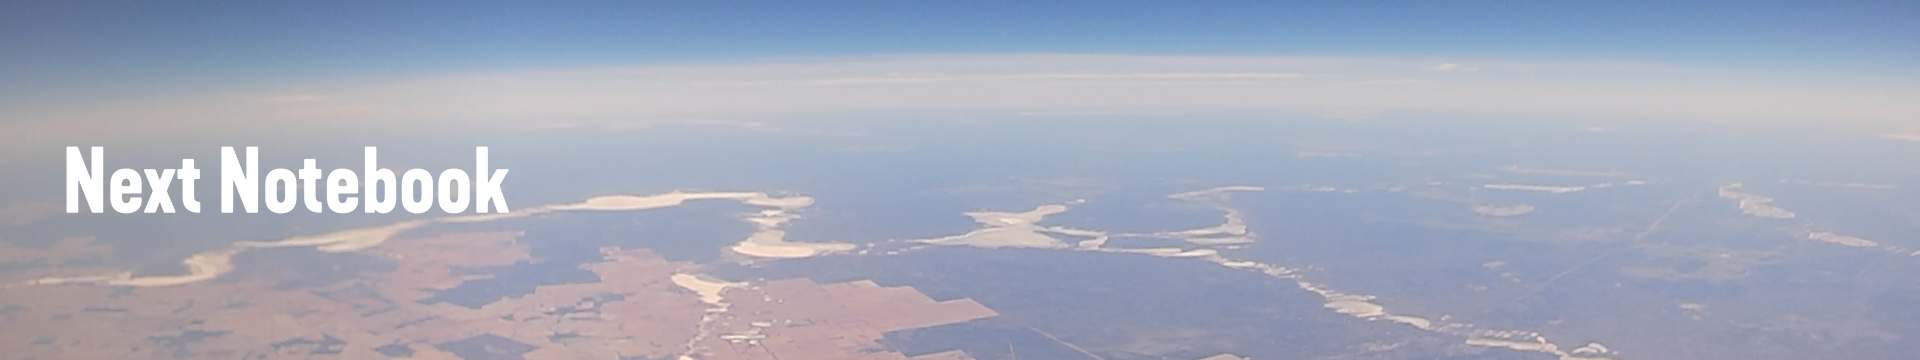](./2.%20Orbital%20Manoeuvres%20%26%20Pertubations.ipynb)